# analyze relationship between GDT_TS and template quality (identity, positive, and coverage)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 100
sns.set(style='darkgrid')
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
from pathlib import Path
dataset_name = 'pisces_multidomain100_identity95_coverage60'
score_dir = Path('../../../../score/' + dataset_name)
plot_dir = score_dir / 'plot'
plot_dir.mkdir(exist_ok=True)
tmscore_path = score_dir / (dataset_name + '_final.csv')
df = pd.read_csv(tmscore_path, index_col=0)
df

,model,GDT_TS,GDT_HA,TMscore,target,template,seq_len,identity,positive,coverage,...,Exptl.,resolution,R-factor,FreeRvalue,PDB_ID,Chain,Domain_num,1,2,3
105,1FHU_A_2PS2_A_3_3,0.452,0.265,0.649,1FHU_A,2PS2_A_3,320,53,102,282,...,XRAY,1.650,0.200,0.270,1FHU,A,2,14.000,140.000,231.000
106,1FHU_A_4MGG_A_3_4,0.494,0.309,0.657,1FHU_A,4MGG_A_3,320,56,107,278,...,XRAY,1.650,0.200,0.270,1FHU,A,2,14.000,140.000,231.000
107,1FHU_A_1WUF_A_3_3,0.557,0.353,0.752,1FHU_A,1WUF_A_3,320,54,114,299,...,XRAY,1.650,0.200,0.270,1FHU,A,2,14.000,140.000,231.000
108,1FHU_A_3Q45_A_3_2,0.572,0.370,0.758,1FHU_A,3Q45_A_3,320,61,108,301,...,XRAY,1.650,0.200,0.270,1FHU,A,2,14.000,140.000,231.000
109,1FHU_A_3GC2_A_1_2,0.972,0.865,0.986,1FHU_A,3GC2_A_1,320,276,291,319,...,XRAY,1.650,0.200,0.270,1FHU,A,2,14.000,140.000,231.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,6RI6_A_5A7E_A_1_3,0.954,0.873,0.982,6RI6_A,5A7E_A_1,498,338,387,490,...,XRAY,0.930,0.110,0.120,6RI6,A,3,96.000,222.000,241.000
17832,6RI6_A_5A7E_A_2_4,0.960,0.886,0.986,6RI6_A,5A7E_A_2,498,335,382,494,...,XRAY,0.930,0.110,0.120,6RI6,A,3,96.000,222.000,241.000
17833,6RI6_A_4A2F_A_1_5,0.955,0.872,0.981,6RI6_A,4A2F_A_1,498,339,386,490,...,XRAY,0.930,0.110,0.120,6RI6,A,3,96.000,222.000,241.000
17834,6RI6_A_2HRG_A_2_1,0.961,0.890,0.985,6RI6_A,2HRG_A_2,498,333,383,494,...,XRAY,0.930,0.110,0.120,6RI6,A,3,96.000,222.000,241.000


In [3]:
for c in ['identity(-misres)','positive(-misres)', 'coverage(-misres)', 'identity', 'positive', 'coverage']:
    df[c + '(%)'] = df[c] / df['seq_len']

## correlation

In [4]:
df[['GDT_TS', 'identity(%)', 'positive(%)', 'coverage(%)', 'identity(-misres)(%)','positive(-misres)(%)', 'coverage(-misres)(%)']].corr()['GDT_TS']

GDT_TS                 1.000
identity(%)            0.745
positive(%)            0.787
coverage(%)            0.445
identity(-misres)(%)   0.755
positive(-misres)(%)   0.798
coverage(-misres)(%)   0.436
Name: GDT_TS, dtype: float64

In [5]:
df[['target', 'GDT_TS', 'identity(%)', 'positive(%)', 'coverage(%)', 'identity(-misres)(%)','positive(-misres)(%)', 'coverage(-misres)(%)']].groupby('target').corr()['GDT_TS'].mean(level=1)

GDT_TS                 1.000
identity(%)            0.787
positive(%)            0.805
coverage(%)            0.424
identity(-misres)(%)   0.797
positive(-misres)(%)   0.817
coverage(-misres)(%)   0.435
Name: GDT_TS, dtype: float64

## Scatter plot between GDT_TS and template quality

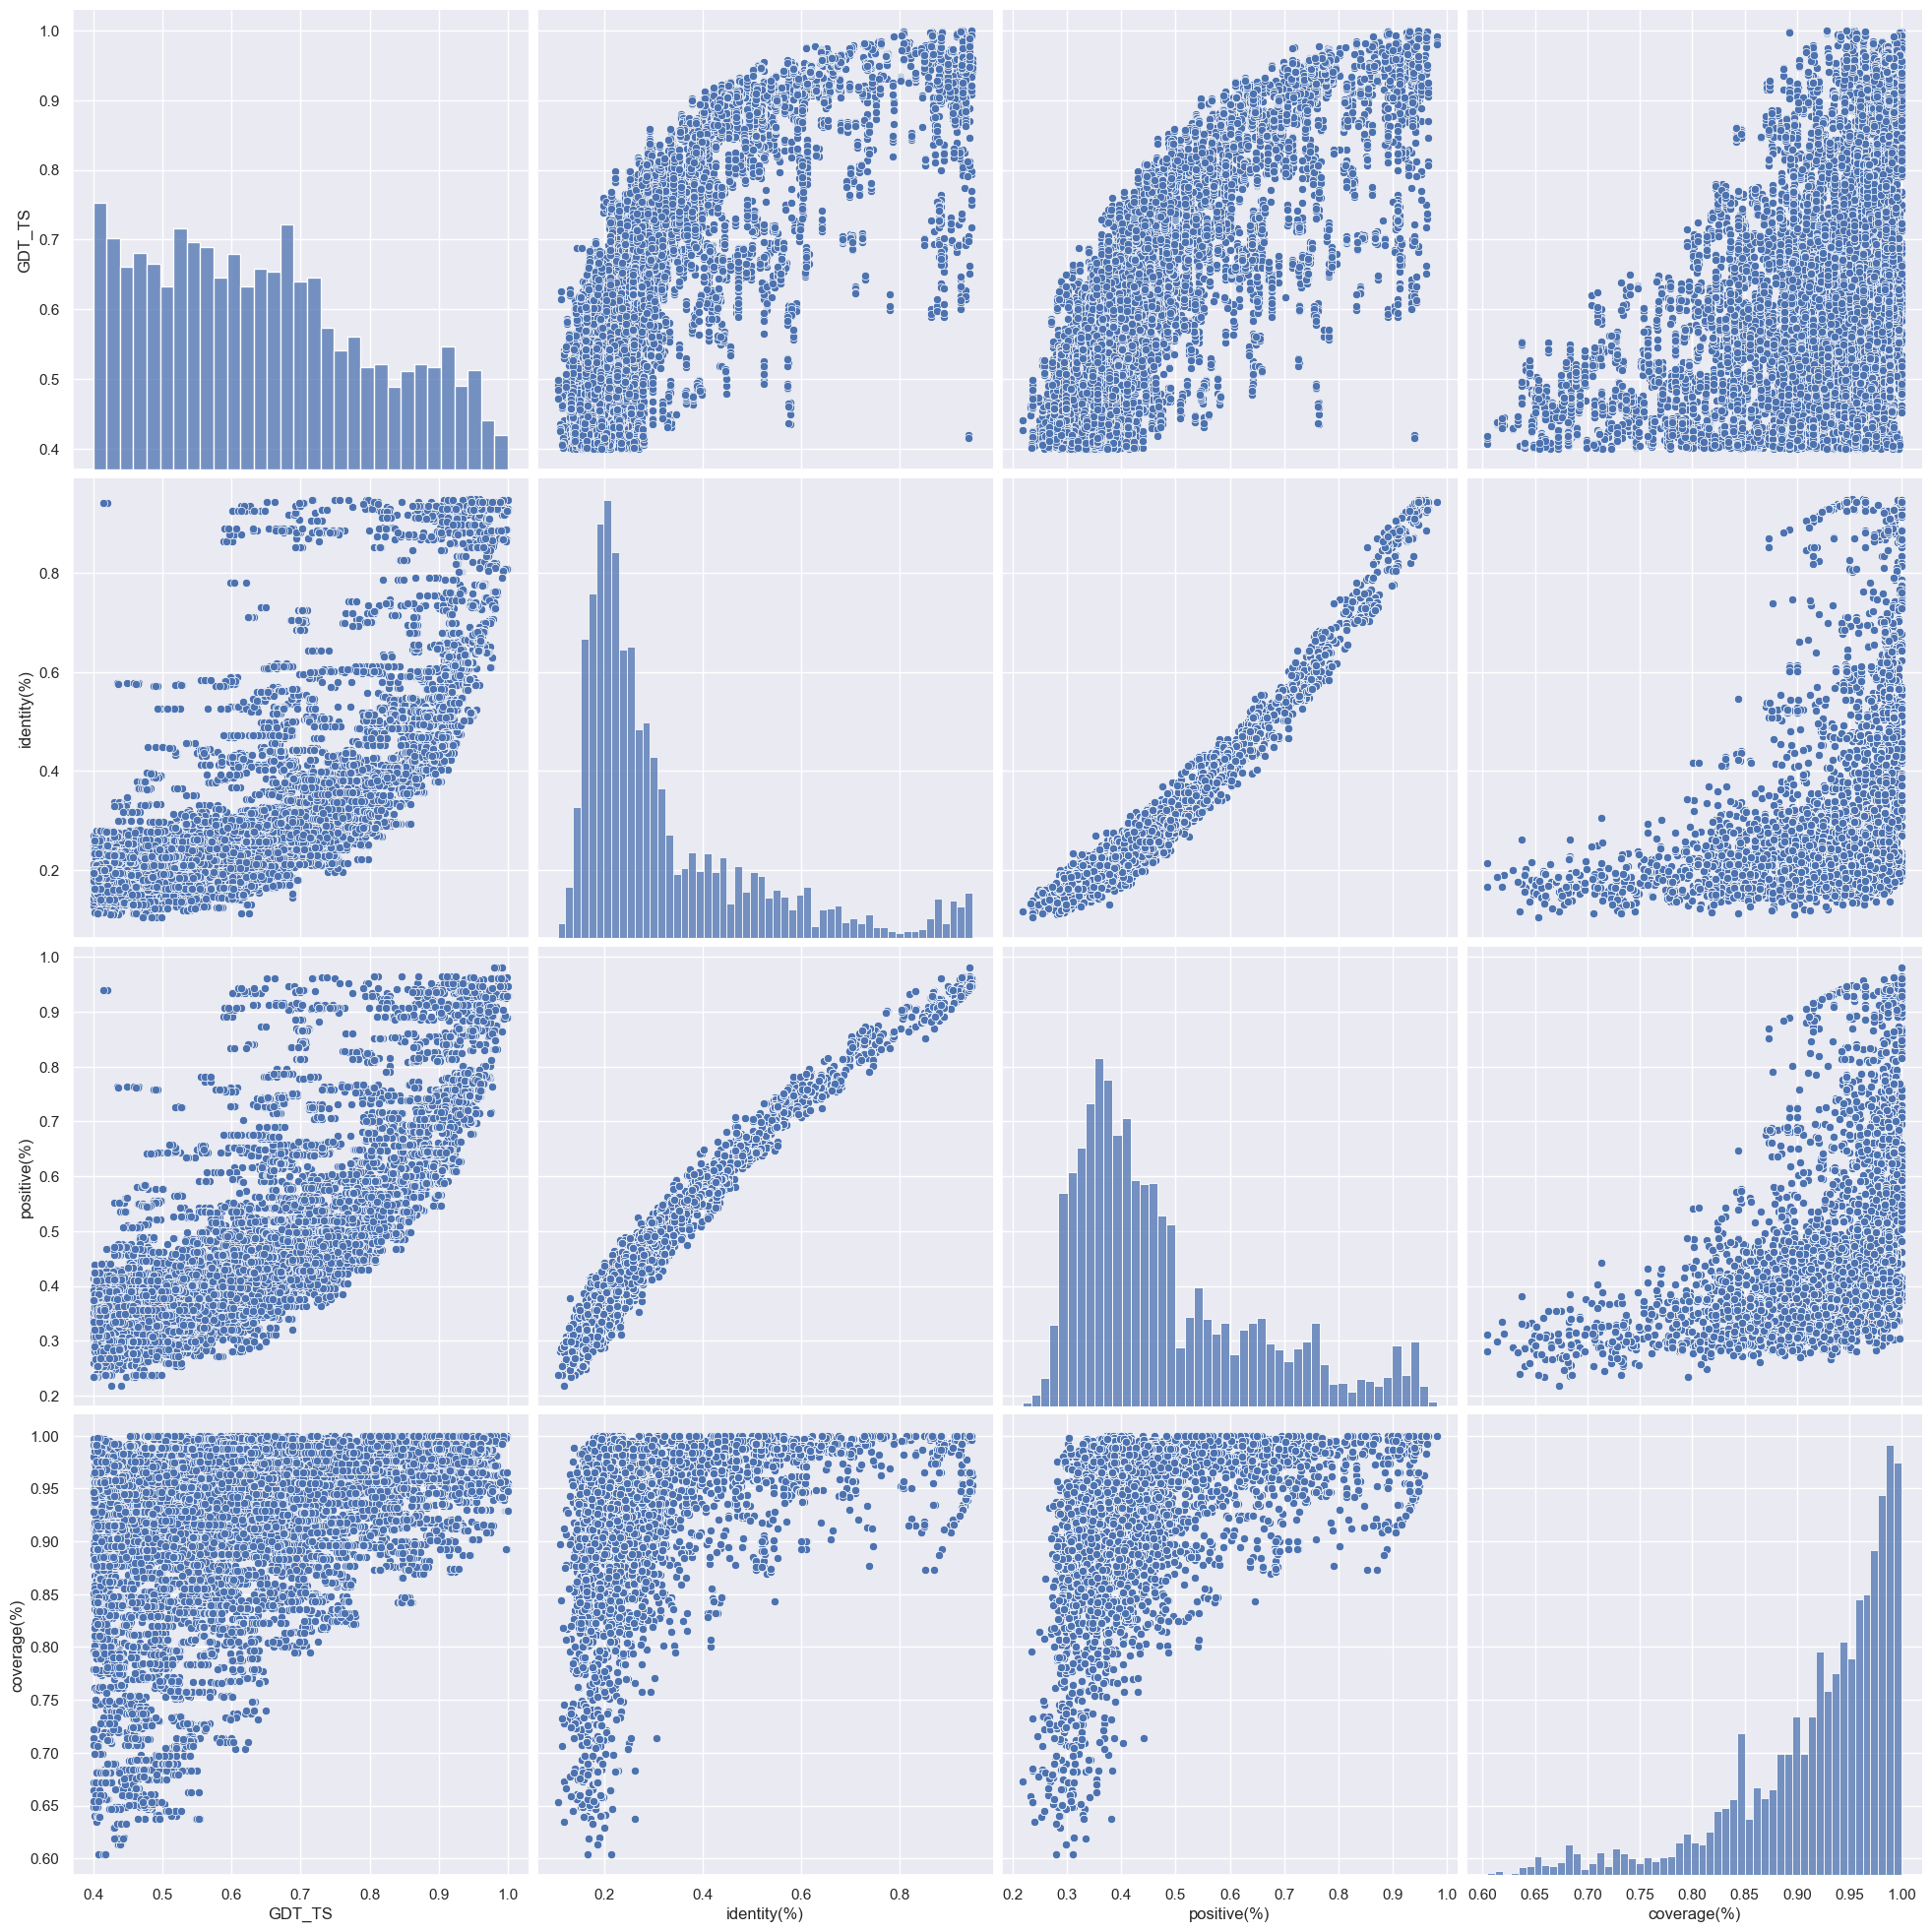

In [6]:
sns.pairplot(df[['GDT_TS', 'identity(%)', 'positive(%)', 'coverage(%)']], size=5)

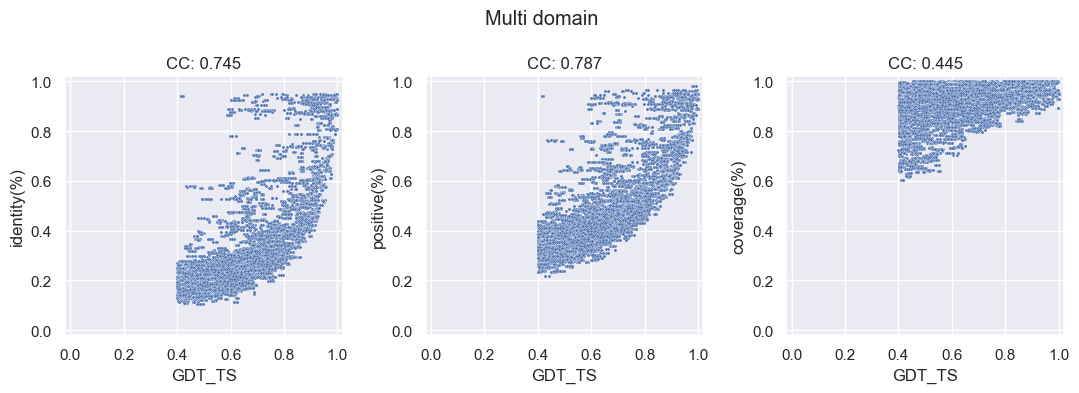

In [7]:
title = 'Multi domain'
figsize = (11, 4)
label = 'GDT_TS'
columns = ['identity(%)', 'positive(%)', 'coverage(%)']
size = 5
lim = [-0.02, 1.02]
nclos = len(columns)
fig, axes = plt.subplots(nrows=1, ncols=nclos, sharex=False, sharey=False, figsize=figsize)
corr = df.corr()[[label] + columns]
for i, column in enumerate(columns):
    sns.scatterplot(data=df, x=label, y=column, s=size, ax=axes[i])
    axes[i].set_xlim(lim)
    axes[i].set_ylim(lim)
    axes[i].set_title('CC: {:.3f}'.format(corr[label][column]))
fig.suptitle(title)
plt.tight_layout()
plt.savefig(plot_dir / 'gdtts_template_quality_scatter.png')

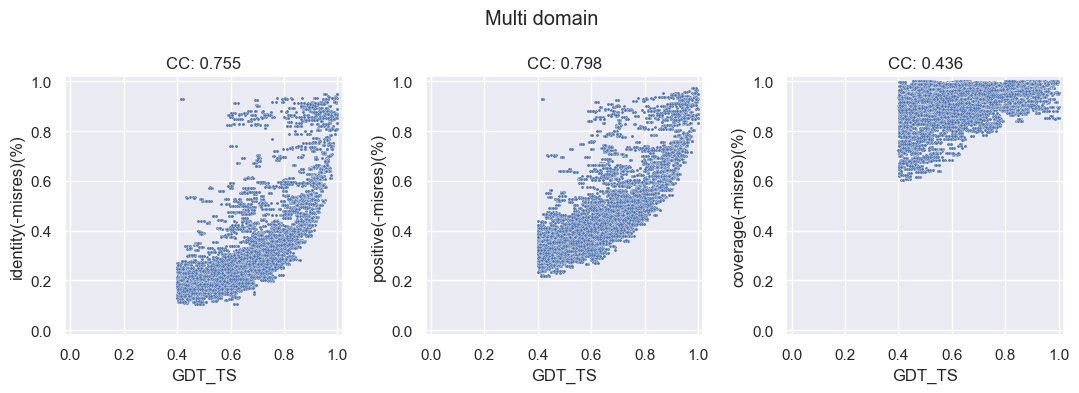

In [8]:
title = 'Multi domain'
figsize = (11, 4)
label = 'GDT_TS'
columns = ['identity(-misres)(%)', 'positive(-misres)(%)', 'coverage(-misres)(%)']
size = 5
lim = [-0.02, 1.02]
nclos = len(columns)
fig, axes = plt.subplots(nrows=1, ncols=nclos, sharex=False, sharey=False, figsize=figsize)
corr = df.corr()[[label] + columns]
for i, column in enumerate(columns):
    sns.scatterplot(data=df, x=label, y=column, s=size, ax=axes[i])
    axes[i].set_xlim(lim)
    axes[i].set_ylim(lim)
    axes[i].set_title('CC: {:.3f}'.format(corr[label][column]))
fig.suptitle(title)
plt.tight_layout()
plt.savefig(plot_dir / 'gdtts_template_quality_considering_misres_scatter.png')